In [1]:
from scipy.optimize import minimize
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
tbl = pd.read_excel("/content/drive/MyDrive/data/regcar.xlsx")
tbl

,TV Ads,car Sold
0,1,14
1,3,24
2,2,18
3,1,17
4,3,27


In [3]:
import statsmodels.api as sm
x = tbl["TV Ads"]
y = tbl['car Sold']
x2 = sm.add_constant(x)
modl = sm.OLS(y, x2)
modl2 = modl.fit()
print(modl2.summary())

                            OLS Regression Results                            
Dep. Variable:               car Sold   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     21.43
Date:                Mon, 07 Apr 2025   Prob (F-statistic):             0.0190
Time:                        18:52:26   Log-Likelihood:                -9.6687
No. Observations:                   5   AIC:                             23.34
Df Residuals:                       3   BIC:                             22.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000      2.366      4.226      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


# b0 = 10 and b1 = 5

In [4]:
e = modl2.resid

In [5]:
e

,0
0,-1.0
1,-1.0
2,-2.0
3,2.0
4,2.0


In [6]:
np.std(e)

1.6733200530681507

In [11]:
def lik(parameters):
    m = parameters[0]
    b = parameters[1]
    sigma = parameters[2]
    for i in np.arange(0, len(x)):
        y_exp = m * x + b

        L = (len(x)/2 * np.log(2 * np.pi) + len(x)/2 * np.log(sigma ** 2) + 1 / (2 * sigma ** 2) * sum((y - y_exp) ** 2))

    return L

In [12]:
lik_model = minimize(lik, np.array([5, 5, 5]), method="Nelder-Mead")

In [13]:
lik_model.x

array([ 4.99997913, 10.00006001,  1.67332791])

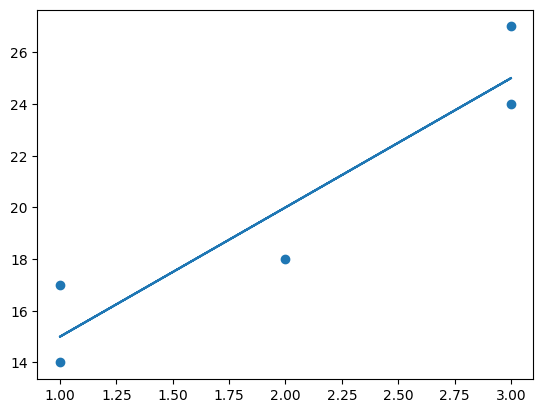

In [14]:
plt.scatter(x, y)
plt.plot(x, lik_model["x"][0] * x + lik_model["x"][1])
plt.show()

In [16]:
minimize?